# Assignment 4 DIT406

#### Carl Kindberg:  12.5 Hours

# ---------------------------------------------------------------------------------------------------------------

#### 1. Preprocessing:  

    a) Note that the email files contain a lot of extra information, besides the actual message. 
    Ignore that for now and run on the entire text. Further down (in the higher-grade part), 
    you will be asked to filter out the headers and footers.  
    
    b) We don’t want to train and test on the same data. Split the spam and the ham datasets 
    into a training set and a test set. (hamtrain, spamtrain, hamtest, and spamtest). 

# ---------------------------------------------------------------------------------------------------------------

In [1]:
# Loading packages

import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Function to load directory... this cell took the most time to write.
# I had a few problems with the spam folder... the two other folder worked fine but there was something different
# in the spamfolder...
# Anyway I finally got it to work except that I had to bruteforce using the setting errors="ignore". I don't know if this 
# is a valid way to do this? Hope it works anyway!

def load_directory(directory, mode):
    values = [] # Empty list to store all values in 
    
    
    count = 0 # initalize a count of the number of files
    
    files = os.listdir(os.path.abspath(directory)) # get each file name
    #print(files) prints name of each file... just a doublecheck so it works :)
    
    
    
    # Loop throgh all files and store 
    for name in files:
        count += 1 # add one for each file
        
        # saving values
        values.append(open(directory + name, mode, errors = "ignore"))  # had to use errors = "ignore", had a problem reading 
                                                                        # the spam file ...
    
    print("Length of directory:", count)
    return values



In [3]:
easy_ham = load_directory(directory = "easy_ham/", mode = "r")
hard_ham = load_directory(directory = "hard_ham/", mode = "r")
spam = load_directory(directory = "spam/", mode = "r")

Length of directory: 2551
Length of directory: 250
Length of directory: 501


In [4]:
# Didn't know how to read all files in a neat way..
# Well this works anyway ;)

easy_ham1 = []
for i in range(0, len(easy_ham)):
    easy_ham1.append(easy_ham[i].read())
    
hard_ham1 = []
for i in range(0, len(hard_ham)):
    hard_ham1.append(hard_ham[i].read())
    
spam1 = []
for i in range(0, len(spam)):
    spam1.append(spam[i].read())
    

easy_ham = easy_ham1
hard_ham = hard_ham1
spam = spam1

In [5]:
# Print some basic information on the datasets.
print("Number of easy ham:", len(easy_ham))
print("Number of hard ham:", len(hard_ham))
print("Number of spam:", len(spam))
print("Total number of messages:", len(easy_ham + hard_ham + spam))
print("Spam ratio:", len(spam) / len(easy_ham + hard_ham + spam))

Number of easy ham: 2551
Number of hard ham: 250
Number of spam: 501
Total number of messages: 3302
Spam ratio: 0.15172622652937615


# ---------------------------------------------------------------------------------------------------------------

#### 1. b) 

# ---------------------------------------------------------------------------------------------------------------

In [6]:
ham = easy_ham + hard_ham # combining easy_ham and hard_ham to a single list
type(ham)

list

In [15]:
frac_testsize = 0.20 # 20% test 80% train which is a pretty standard split size.
seed = 666 # seed for reproducibility

# Split the datasets
hamtrain, hamtest = train_test_split(ham, test_size = frac_testsize, random_state = seed)
spamtrain, spamtest = train_test_split(spam, test_size = frac_testsize, random_state = seed)

# ---------------------------------------------------------------------------------------------------------------

#### 2. Write a Python program that:

    a. Uses four datasets (hamtrain, spamtrain, hamtest, and spamtest)
    
    b. Trains a Naïve Bayes classifier (e.g. from Sklearn) on the training sets (hamtrain and 
    spamtrain), then classifies the test sets (hamtest and spamtest) and reports the 
    percentage of ham and spam test sets that were classified correctly. You can use
    CountVectorizer to transform the email texts into vectors. Please note that there are 
    different types of Naïve Bayes Classifier in SKlearn (documentation is available here). 
    Test two of these classifiers: 1. Multinomial Naive Bayes and 2. Bernoulli Naive Bayes
    that are well suited for this problem. For the case of Bernoulli Naive Bayes you should 
    use the parameter binarize to make the features binary. Discuss the differences 
    between these two classifiers.
    
# ---------------------------------------------------------------------------------------------------------------

In [8]:
# 2. a) and b)
# Creates a prediction model with the inputs: ham, spam, frac_testsize, seed, and which model.

vectorizer = CountVectorizer()  # Vectorizer function
conf_matrix = [] # Empty list
acc = [] # Empty list
binarize = 0.0 # Set binarize to zero.

def pred(ham, spam, frac_testsize, seed, model):
    
    # Split to train and test data.
    hamtrain, hamtest = train_test_split(ham, test_size = frac_testsize, random_state = seed)
    spamtrain, spamtest = train_test_split(spam, test_size = frac_testsize, random_state = seed)

    # Using the vectorizer function defined above and rename the sets.
    train_set = vectorizer.fit_transform(hamtrain + spamtrain) 
    test_set = vectorizer.transform(hamtest + spamtest)
    
    # Adds the correct labels to corresponding sets.
    Type_train = [0] * len(hamtrain) + [1] * len(spamtrain) 
    Type_test = [0] * len(hamtest) + [1] * len(spamtest)
    
    # Training the model 
    model = model
    model.fit(train_set, Type_train)
    
    # Using the trained model to predict on the test set.
    pred_model = model.predict(test_set)
    
    # Storing results from each run in a list.
    acc.append(model.score(test_set, Type_test)) 
    conf_matrix.append(confusion_matrix(Type_test, pred_model))


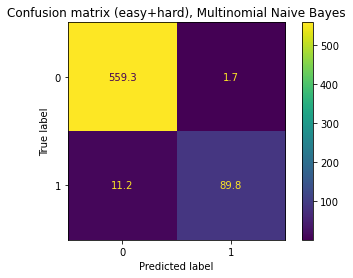

Average accuracy: 0.9805135951661628


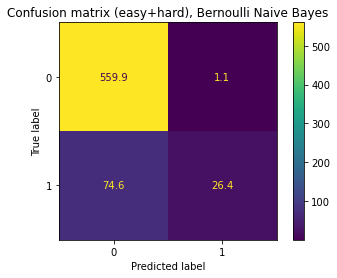

Average accuracy: 0.8856948640483366
Elapsed time: 409.5516707897186 sec


In [9]:
# Let's run this program 100 times and average to get a "stable" result

# MultinomialNB
start = time.time()

conf_matrix = []
acc = []
runs = 100
for i in range(0, runs): 
    pred(easy_ham+hard_ham, spam, 0.2, i, model = MultinomialNB())
        
avg_conf_matrix_MNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_MNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (easy+hard), Multinomial Naive Bayes')
plt.show()

print("Average accuracy:", avg_acc)


# BernoulliNB
conf_matrix = []
acc = []
for i in range(0,runs):  
    pred(easy_ham+hard_ham, spam, 0.2, i, model =BernoulliNB(binarize = binarize)) 
    
avg_conf_matrix_BNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_BNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (easy+hard), Bernoulli Naive Bayes')
plt.show()

print("Average accuracy:", avg_acc)

print("Elapsed time:", (time.time() - start),"sec")

After we have runned this program 100 times for both Multinomial Naive Bayes (MNB) and Bernoulli Naive bayes (BNB) we can see some differences in the results. 
In the MNB setting we can see that the average accuracy is approximate 10 percentage points better than the BNB settings.
That is because when we use the MNB setting we predict both ham and spam pretty good. But when we use the BNB setting one can see that we we alot of False negatives. To be more exact we get 74.6/662=11.26% false negatives and therefore we get a lower average accuracy for BNB compared to MNB.

So we can see that both models have approximate the same results when it comes to True positives and False positives.
The differences is the number of False negative and True false.

# ---------------------------------------------------------------------------------------------------------------

#### 3. Run your program on:

    i) Spam versus easy-ham
    
    ii) Spam versus hard-ham
    and include the results in your report.

# ---------------------------------------------------------------------------------------------------------------

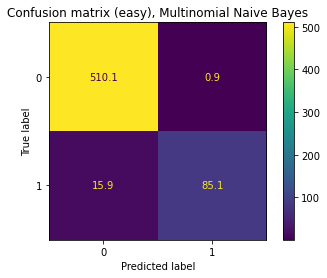

Average accuracy: 0.9724999999999997


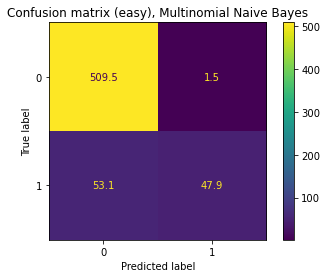

Average accuracy: 0.9107679738562088


In [10]:
# Let's run the exact same program again except that we only use eaasy ham here.
# MultinomialNB easy_ham
conf_matrix = []
acc = []
runs = 100
for i in range(0,runs):  
    pred(easy_ham, spam, 0.2, i, model = MultinomialNB())
        
avg_conf_matrix_MNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_MNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (easy), Multinomial Naive Bayes')
plt.show()


print("Average accuracy:", avg_acc)

# BernoulliNB easy_ham
conf_matrix = []
acc = []
for i in range(0,runs): 
    pred(easy_ham, spam, 0.2, i, model = BernoulliNB(binarize = 0.0))
        
avg_conf_matrix_MNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_MNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (easy), Bernoulli Naive Bayes')
plt.show()


print("Average accuracy:", avg_acc)

When we do the exact same run on just the easyham dataset we get approxiamte the same results as we did in the question before.

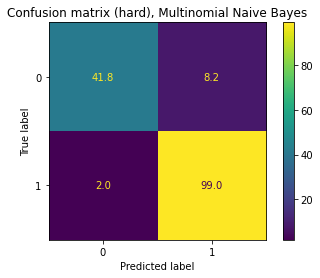

Average accuracy: 0.9325827814569548


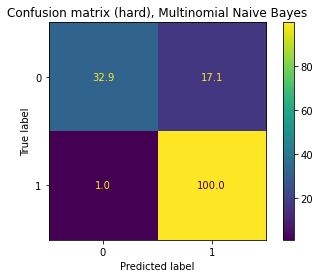

Average accuracy: 0.8798675496688751


In [11]:
# Let's run the exact same program again except that we only use eaasy ham here.
# MultinomialNB hard_ham

conf_matrix = []
acc = []
runs = 100
for i in range(0, runs):  
    pred(hard_ham, spam, 0.2, i, model = MultinomialNB())
        
avg_conf_matrix_MNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_MNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (hard), Multinomial Naive Bayes')
plt.show()


print("Average accuracy:", avg_acc)

# BernoulliNB hard_ham
conf_matrix = []
acc = []
for i in range(0, runs):  
    pred(hard_ham, spam, 0.2, i, model = BernoulliNB(binarize = 0.0))
        
avg_conf_matrix_MNB = sum(conf_matrix) / len(conf_matrix)
avg_acc = sum(acc) / len(acc)

CMD = ConfusionMatrixDisplay(confusion_matrix= avg_conf_matrix_MNB)
CMD.plot(values_format=".1f")

plt.title('Confusion matrix (hard), Bernoulli Naive Bayes')
plt.show()


print("Average accuracy:", avg_acc)

Here something interesting happens, when we try to predict the hardham dataset we get a few differences between the two models.
In the previous runs we did for easyham and the combined dataset easyham+hardham we always got alot more False negatives. 

In this case we actullay got fewer False negatives using BNB than the MNB setting (1 vs 2...). Still the MNB setting get a higher average accuracy but the difference between the two models is the predicted True positives and False postives instead of the True negative and the False negatives.

Depending how we want to use this filtering the BNB setting might actually be better when we predict on the hardham dataset.